1) check the histogram of number of frames per segment

Each segment was padded or truncated to 320 frames, reflecting the 75th percentile of the dataset. This choice preserves temporal information for the majority of samples while ensuring computational efficiency and uniform input dimensions for model training

10833


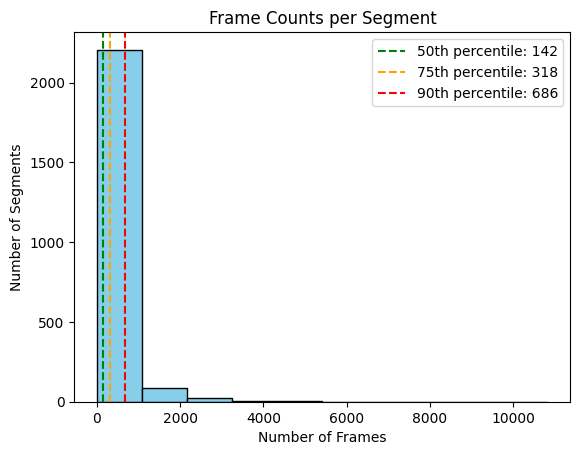

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

frames_base_dir = r"D:\UK\00. 2024 QMUL\00. Course\Project\SAV-VIOLENCEDETECTION\00. Actual Dataset\Frames_multimodal"

frame_counts = []
for segment_folder in os.listdir(frames_base_dir):
    segment_path = os.path.join(frames_base_dir, segment_folder)
    if os.path.isdir(segment_path):
        num_frames = len([f for f in os.listdir(segment_path) if f.endswith('.jpg')])
        frame_counts.append(num_frames)

percentile_50 = int(np.percentile(frame_counts, 50))
percentile_75 = int(np.percentile(frame_counts, 75))
percentile_90 = int(np.percentile(frame_counts, 90))
max_frames = max(frame_counts)

plt.hist(frame_counts, bins=10, color='skyblue', edgecolor='black')
plt.axvline(percentile_50, color='green', linestyle='--', label=f'50th percentile: {percentile_50}')
plt.axvline(percentile_75, color='orange', linestyle='--', label=f'75th percentile: {percentile_75}')
plt.axvline(percentile_90, color='red', linestyle='--', label=f'90th percentile: {percentile_90}')
plt.title('Frame Counts per Segment')
plt.xlabel('Number of Frames')
plt.ylabel('Number of Segments')
plt.legend()
print(max_frames)